In [ ]:
import numpy as np

In [15]:
#Задача 1
a = np.random.random((10,3))
a[np.arange(10), np.absolute(a-0.5).argmin(axis=1)]

array([[0.40240776, 0.1802184 , 0.64214751],
       [0.60408741, 0.8823533 , 0.82895391],
       [0.8199457 , 0.13408759, 0.80602447],
       [0.70299651, 0.47076438, 0.13894277],
       [0.67854224, 0.17652219, 0.64705147],
       [0.37943101, 0.99050437, 0.56549358],
       [0.10509448, 0.80316056, 0.36273848],
       [0.61990986, 0.67687564, 0.3924044 ],
       [0.38724089, 0.58629544, 0.59209349],
       [0.90653527, 0.89781553, 0.38675731]])

In [26]:
#Задача 2
b = np.random.random((6,6))
b.sum(axis=1)/b.min(axis=0)

array([[0.06208766, 0.33748191, 0.96311038, 0.10710316, 0.3110894 ,
        0.17172517],
       [0.10726476, 0.05657186, 0.11703651, 0.69306761, 0.26153716,
        0.0533318 ],
       [0.37277561, 0.33642279, 0.35478057, 0.8347799 , 0.82419354,
        0.74601195],
       [0.10979725, 0.24689424, 0.30767095, 0.58155074, 0.68731713,
        0.21174492],
       [0.34569899, 0.86875555, 0.49429912, 0.98923391, 0.67032034,
        0.61038551],
       [0.7508434 , 0.38149586, 0.06849032, 0.12006897, 0.99668867,
        0.81703822]])

In [63]:
#Задача 3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = x == 0
x[1:][mask[:-1]].max()

5

In [68]:
#Задача 4
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
np.take(x, i)

array([1., 1., 1., 1., 1., 1., 1., 1.])

# K-means
## Задача 6


In [224]:
eps = 1e-09

In [225]:
#Get dataset on old faithful geyser eruptions
data = np.genfromtxt('dataset-44970.csv', delimiter=',', skip_header=1)

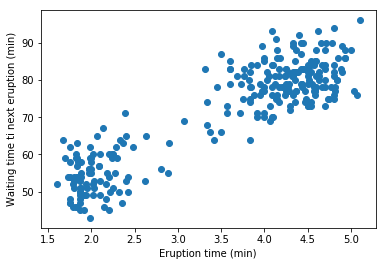

In [213]:
#Visualize data
import matplotlib.pyplot as plt

plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')
plt.show()

In [228]:
#Standardize data to zero mean and unit st
data = data - data.mean(axis=0)
data = data/data.std(axis=0)

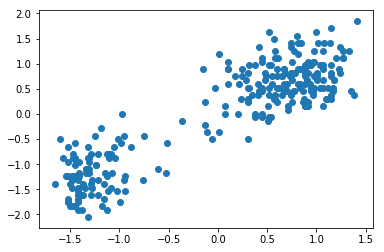

In [215]:
#Plot standardized data
plt.scatter(*data.T)
plt.show()

In [216]:
#Initial guess on centroid locations
centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))

In [218]:
def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    dist_0 = np.linalg.norm(pts - centroids[0], axis=1)
    dist_1 = np.linalg.norm(pts - centroids[1], axis=1)
    labels = dist_0 <= dist_1

    return labels.astype(int)
#1 - vtoroi
#0 - pervii

In [219]:
#Get labels according to current centroids
labels = get_labels(data, centroids)
centroids_1 = np.zeros(4).reshape((2,2))

In [229]:
while np.linalg.norm(centroids[0]-centroids_1[0]) >= eps:
    labels_ne = labels.astype(bool) != True
    centroids = centroids_1
    centroids_1 = np.vstack((data[labels_ne.astype(bool)].mean(axis=0), data[labels.astype(bool)].mean(axis=0)))
    labels = get_labels(data, centroids_1)

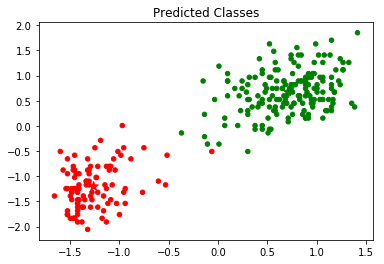

In [230]:
#Plot predicted classes. Circles show data points distribution, stars show centroids location
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids_1.T, c=["green", "red"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()